In [1]:
from scipy.spatial import distance as dst
from imutils import perspective
from imutils import contours
import numpy as np
import imutils
import cv2

In [2]:
def midpoint(ptA , ptB):
    return ((ptA[0] + ptB[0]) * 0.5 , (ptA[1] + ptB[1]) * 0.5 )

In [3]:
image = cv2.imread('image4.jpg')
width = 2.95
gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray , (7,7) , 0)

In [4]:
import matplotlib.pyplot as plt

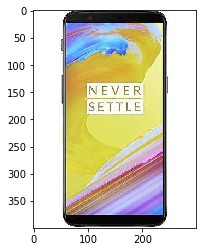

In [5]:
plt.imshow(image)

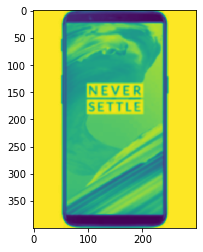

In [6]:
plt.imshow(gray)

In [7]:
edged = cv2.Canny(gray , 50 , 100)
edged = cv2.dilate(edged , None , iterations = 1)
edged = cv2.erode(edged , None , iterations = 1)

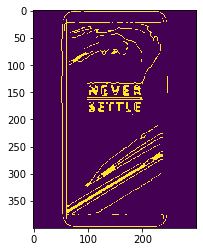

In [8]:
plt.imshow(edged)

In [9]:
# find contours

cnts = cv2.findContours(edged.copy() , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [10]:
(cnts , _) = contours.sort_contours(cnts)
ppm = None

In [11]:
for c in cnts:
    
    if cv2.contourArea(c) < 100:
        continue
        
    oxrig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box , dtype='int')
    
    
    box = perspective.order_points(box)
    cv2.drawContours(oxrig , [box.astype('int')] , -1 , (0,255,0) , 2)
    
    for (x,y) in box:
        cv2.circle(oxrig , (int(x) , int(y)) , 5 , (0,0,255) , -1)
        
        
    (tl ,tr,br ,bl) = box
    (tltrX , tltrY) = midpoint(tl , tr)
    (blbrX , blbrY) = midpoint(bl , br)
    (tlblX , tlblY) = midpoint(tl , bl)
    (trbrX , trbrY) = midpoint(tr , br)
    
    cv2.circle(oxrig , (int(tltrX) , int(tltrY)) , 5 , (255,0,0) , -1)
    
    cv2.circle(oxrig , (int(blbrX) , int(blbrY)) , 5 , (255,0,0) , -1)
    
    cv2.circle(oxrig , (int(tlblX) , int(tlblY)) , 5 , (255,0,0) , -1)
    
    cv2.circle(oxrig , (int(trbrX) , int(trbrY)) , 5 , (255,0,0) , -1)
    
    
    
    cv2.line(oxrig ,  (int(tltrX) , int(tltrY)) , (int(blbrX) , int(blbrY)) , (255,0,255) , 2)
    
    cv2.line(oxrig ,  (int(tlblX) , int(tlblY)) , (int(trbrX) , int(trbrY)) , (255,0,255) , 2)
    
    dA = dst.euclidean((tltrX , tltrY) , (blbrX , blbrY))
    dB = dst.euclidean((tlblX , tlblY) , (trbrX , trbrY))
    
    if ppm is None:
        ppm = dB / 0.955
        print(ppm)
        
    dimA = dA / ppm
    dimB = dB / ppm
    
    
    cv2.putText(oxrig , "{:.1f}in".format(dimA) , ( int(tltrX - 15) , int(tltrY - 10) ) ,
                cv2.FONT_HERSHEY_SIMPLEX , 0.65 , (255,0,0) , 2)
    
    cv2.putText(oxrig , "{:.1f}in".format(dimB) , ( int(trbrX + 10) , int(trbrY) ) ,
                cv2.FONT_HERSHEY_SIMPLEX , 0.65 , (255,0,0) , 2)
    
    cv2.imshow('image' , oxrig)
    cv2.waitKey(0)

203.1413612565445
